In [2]:
# Importing required libraries
import os
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Downloading required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the folder path where the text files are stored
folder_path = '/ML/Assigment/articles'

# Step 1: Read all text files from the folder and store their content in a list
files = os.listdir(folder_path)
texts = []

# Loop through all files in the folder and read their contents
for file in files:
    if file.endswith('.txt'):  # Ensure you're reading only .txt files
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())

# Step 2: Create a DataFrame from the text files
df = pd.DataFrame(texts, columns=['Review'])
df['File Name'] = files

# Step 3: Cleaning the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs, numbers, and special characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Apply the cleaning function to the 'Review' column
df['cleaned_review'] = df['Review'].apply(clean_text)

# Step 4: Tokenization
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the cleaned text
df['tokenized_review'] = df['cleaned_review'].apply(tokenize_text)

# Step 5: Removing stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Remove stopwords from the tokenized reviews
df['cleaned_tokens'] = df['tokenized_review'].apply(remove_stopwords)

# Step 6: Lemmatization (reducing words to their base form)
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to the tokenized reviews
df['lemmatized_tokens'] = df['cleaned_tokens'].apply(lemmatize_tokens)

# Step 7: Convert the cleaned and lemmatized tokens back to text
def tokens_to_text(tokens):
    return ' '.join(tokens)

# Join tokens back into a single string for each review
df['final_review'] = df['lemmatized_tokens'].apply(tokens_to_text)

# Step 8: Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 words
X = vectorizer.fit_transform(df['final_review'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X.shape)

# Display a sample of the vectorized features (first 10)
print("Feature names (first 10):", vectorizer.get_feature_names_out()[:10])




[nltk_data] Downloading package punkt to
[nltk_data]     /home/minidutissera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/minidutissera/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minidutissera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/minidutissera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape of TF-IDF matrix: (2806, 5000)
Feature names (first 10): ['aaplo' 'aaron' 'ab' 'abandoned' 'ability' 'able' 'abramowitz' 'abroad'
 'absence' 'absolutely']



Cluster 1:
Top 10 terms: ['facebook', 'amazon', 'google', 'ad', 'user', 'twitter', 'video', 'app', 'service', 'mobile']

Cluster 2:
Top 10 terms: ['company', 'uber', 'said', 'billion', 'apple', 'million', 'china', 'year', 'investor', 'india']

Cluster 3:
Top 10 terms: ['percent', 'revenue', 'quarter', 'share', 'billion', 'million', 'snippet', 'mp', 'company', 'year']

Silhouette Score: 0.009916547721038982


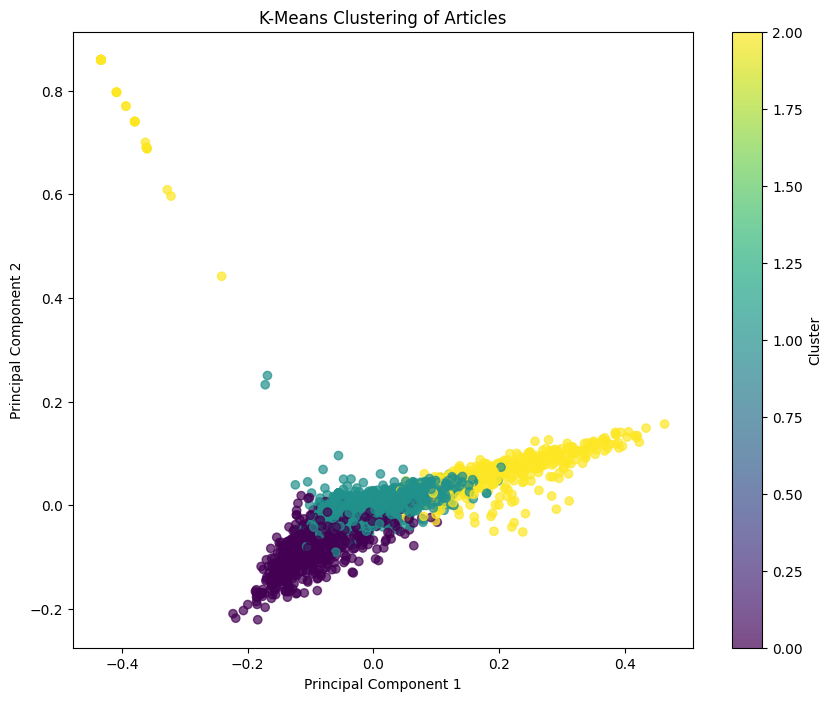

In [3]:
# Importing the necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


k = 5

# Step 2: Initialize the KMeans model and fit it to the TF-IDF matrix
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)  # X is the TF-IDF matrix

# Step 3: Get the cluster labels for each document
df['Cluster'] = kmeans.labels_



# Get the top 10 words for each cluster
top_n = 10
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Print the top terms for each cluster
for i in range(k):
    print(f"\nCluster {i+1}:")
    print("Top 10 terms:", [terms[ind] for ind in order_centroids[i, :top_n]])

# Step 5: Evaluate the clustering using silhouette score
sil_score = silhouette_score(X, kmeans.labels_)
print(f"\nSilhouette Score: {sil_score}")

# Step 6: Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Reduce the dimensionality of the TF-IDF matrix to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.7)
plt.title("K-Means Clustering of Articles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()



Silhouette Score: 0.013751304379606559

Cluster 1:
Top 10 terms: ['amazon', 'prime', 'service', 'delivery', 'customer', 'retailer', 'product', 'aws', 'company', 'item']

Cluster 2:
Top 10 terms: ['uber', 'company', 'billion', 'investor', 'million', 'valuation', 'round', 'startup', 'funding', 'said']

Cluster 3:
Top 10 terms: ['percent', 'revenue', 'share', 'billion', 'quarter', 'snippet', 'million', 'mp', 'company', 'year']

Cluster 4:
Top 10 terms: ['apple', 'iphone', 'watch', 'samsung', 'pay', 'china', 'sale', 'said', 'company', 'store']

Cluster 5:
Top 10 terms: ['facebook', 'google', 'company', 'user', 'ad', 'twitter', 'said', 'video', 'new', 'app']


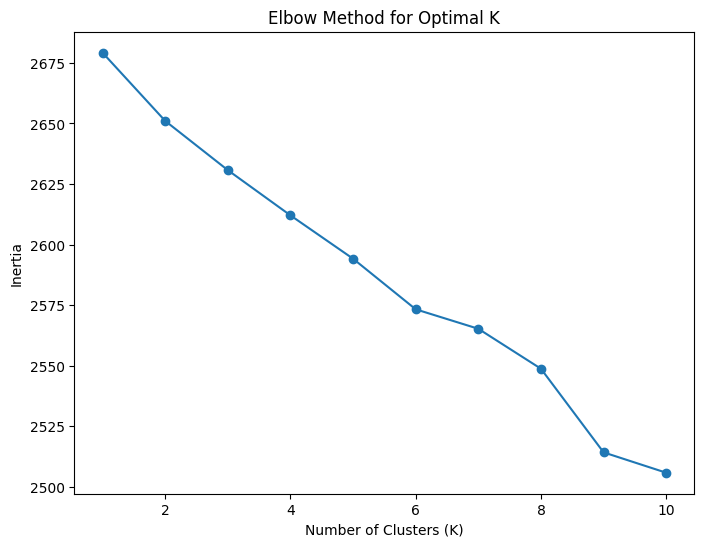

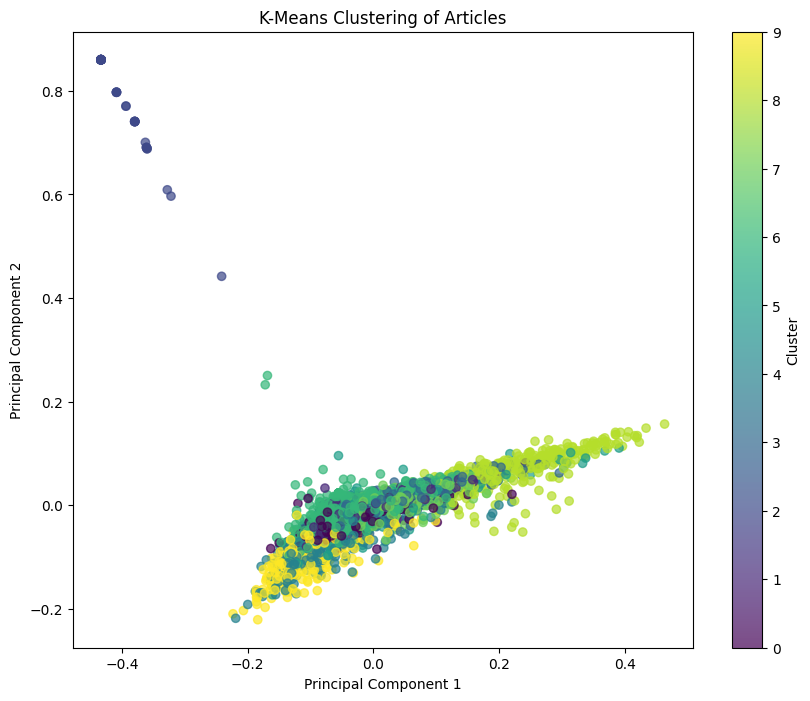

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Step 4.1: Evaluate the clustering using Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


# Step 4.2: Analyze the top terms (words) for each cluster
top_n = 10  # Top 10 terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # Sort the cluster centers
terms = vectorizer.get_feature_names_out()

# Print the top terms for each cluster
for i in range(k):
    print(f"\nCluster {i+1}:")
    print("Top 10 terms:", [terms[ind] for ind in order_centroids[i, :top_n]])

# Step 4.3:Elbow Method to find the optimal number of clusters (K)

inertia = []
for k in range(1, 11):  # Checking from K=1 to K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Step 4.4: Visualizing clusters in 2D using PCA (if not already done)
from sklearn.decomposition import PCA

# Reduce the TF-IDF matrix to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Plotting the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.7)
plt.title("K-Means Clustering of Articles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()
